## 1.1 获取外部样本数据

In [27]:
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt

In [82]:
# 从外部源获取数据
boston = datasets.load_boston()
data1 = boston.data
label1 = boston.target
print(data1.shape,label1.shape)

(506, 13) (506,)


## 1.2 创建实验样本数据

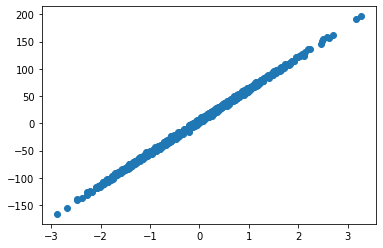

(1000, 1)

In [73]:
# 生成回归数据
reg_data = datasets.make_regression(n_samples=1000,n_features=1,n_targets=1,bias=4.5,noise=1.9)

fig = plt.figure(1)
plt.scatter(reg_data[0],reg_data[1])
plt.show()
reg_data[0].shape

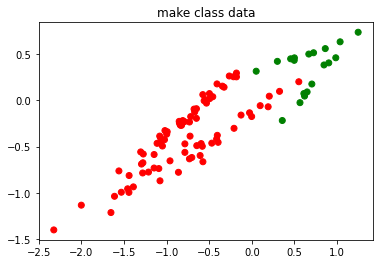

[81 19]


In [80]:
# 构建分类数据
cls_data = datasets.make_classification(n_features=4,weights=[0.8])
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.set_title("make class data")
colors = np.array(['r','g','b'])
plt.scatter(cls_data[0][:,0],cls_data[0][:,1],color=colors[cls_data[1].astype(int)])
plt.show()
print(np.bincount(cls_data[1]))

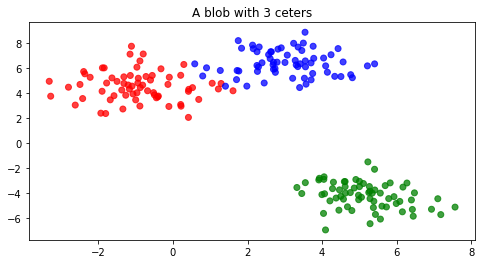

In [71]:
# 生成聚簇的数据
blobs = datasets.make_blobs(200)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_title("A blob with 3 ceters")
colors = np.array(['r','g','b'])
ax.scatter(blobs[0][:,0],blobs[0][:,1],color=colors[blobs[1].astype(int)],alpha=0.75)

## 1.3 把数据调整为正太分布

In [106]:
# 把数据调整为正态分布。直接进行标准化
from sklearn import preprocessing
X,y= boston.data,boston.target
X_mean = X[:,:3].mean(axis=0)
X_std = X[:,:3].std(axis=0)
print(X_mean,X_std)
X2 = preprocessing.scale(X[:,:3])
X2_mean = X2.mean(axis=0)
X2_std = X2.std(axis=0)
print(X2_mean,X2_std)
# 使用minimax方法标准化。标准化对象持续标准化
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit(X[:,:3])
X3 = minmax_scaler.transform(X[:,:3])
print(X3.min(axis=0),X3.max(axis=0))
# 使用正态分布标准化。标准化对象，持续标准化后续数据
X4 = preprocessing.normalize(X[:,:3])
print(X4.mean(axis=0),X4.std(axis=0))

[ 3.61352356 11.36363636 11.13677866] [ 8.59304135 23.29939569  6.85357058]
[-8.78743718e-17 -6.34319123e-16 -2.68291099e-15] [1. 1. 1.]
[0. 0. 0.] [1. 1. 1.]
[0.14657712 0.25834782 0.7353328 ] [0.22612514 0.43091533 0.36638317]


## 1.5 分类变量处理

In [140]:
# 维度转换.用来合并两个矩阵
# column实现了多列合并。次级元素按列组合
print(np.column_stack(([1,2,3],[4,5,6])))
print(np.column_stack([1,2,3]))
# row实现了按行合并.次级元素按行组合
print(np.row_stack([[1],[2],[3]]))
print(np.row_stack([1,2,3]))
d = np.column_stack((X[:,:2],y))
# 分类变量的处理，OneHotEncoder编码数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
d = np.column_stack((X,y))

text_encoder = preprocessing.OneHotEncoder()
a = text_encoder.fit_transform(d[:,-1:]).toarray()
print(a[:5])
# 将字符串按字典方式编码
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
my_dict = [{'speciex':iris.target_names[i]}for i in y]
b = dv.fit_transform(my_dict).toarray()[:5]
print(b[:5])

[[1 4]
 [2 5]
 [3 6]]
[[1 2 3]]
[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## 1.7 处理缺失值

In [183]:
# 处理缺失值
iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1,0.3,iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan
print(iris_X[:5,:5])
# 新版本有所改变，使用impute子库处理缺失值
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
print(imp_mean.fit_transform(iris_X)[:5,:5])

[[5.1 3.5 1.4 nan]
 [4.9 3.  1.4 0.2]
 [4.7 nan nan nan]
 [nan 3.1 nan 0.2]
 [nan 3.6 1.4 0.2]]
[[5.1        3.5        1.4        1.2625    ]
 [4.9        3.         1.4        0.2       ]
 [4.7        3.06568627 3.81339286 1.2625    ]
 [5.82831858 3.1        3.81339286 0.2       ]
 [5.82831858 3.6        1.4        0.2       ]]


## 1.8 用管线命令处理多个步骤

In [190]:
# 用管线处理多个步骤
mat = datasets.make_spd_matrix(10)
masking_array = np.random.binomial(1,0.1,mat.shape).astype(bool)
mat[masking_array] = np.nan
print(mat[:4,:4])

# 新版本有所改变，使用impute子库处理缺失值
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
scaler = preprocessing.StandardScaler()

# 不用管线处理
# imp_mean.fit_transform(mat[:4,:4])

# 使用pipline处理多个数据
from sklearn import pipeline
pip = pipeline.Pipeline([('impute',imp_mean),('scaler',scaler)])

new_mat = pip.fit_transform(mat)
print(new_mat[:4,:4])

[[        nan         nan -0.04127661 -0.55209683]
 [ 1.17699621         nan -0.04545117 -0.53006478]
 [-0.04127661 -0.04545117  0.63339002         nan]
 [-0.55209683 -0.53006478  0.00713861  0.95715395]]
[[ 0.00000000e+00  0.00000000e+00 -5.23706644e-01 -1.37409352e+00]
 [ 1.97327379e+00  0.00000000e+00 -5.44938484e-01 -1.33350645e+00]
 [ 1.04969653e-02  7.52332130e-01  2.90765215e+00 -5.11308615e-17]
 [-8.12492816e-01  1.65691064e-01 -2.77466538e-01  1.40622325e+00]]


## 1.9 使用主成分分析降维
* 考虑的自变量对因变量产生影响的比例。
* 通过主成分分析，讲这种影响比例，进行交叉，保证各个影响因变量的自变量相互垂直。

[0.92461872 0.05306648]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


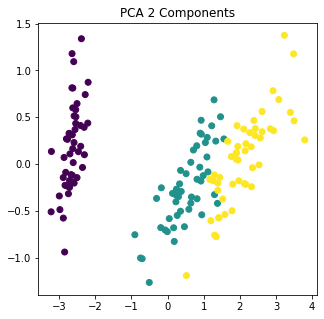

In [204]:
# 使用主成分分析
from sklearn import datasets
from sklearn import decomposition
iris = datasets.load_iris()
iris_X = iris.data
pca = decomposition.PCA(n_components=2)
iris_pca = pca.fit_transform(iris_X)
# 输出特征值
print(pca.explained_variance_ratio_)
# 输出降维后的特征向量
print(iris_pca[:5])

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target)
ax.set_title("PCA 2 Components")

# pca还可以设置主成分保留的比例、不小于0.98
pca = decomposition.PCA(n_components=0.98)


## 1.10 用因子分析降维
* 自变量之间也存在某种隐含的关系。

Text(0.5, 1.0, 'fac 2 Components')

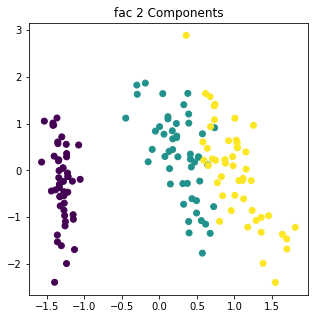

In [206]:
from sklearn import datasets
from sklearn import decomposition
iris = datasets.load_iris()
iris_X = iris.data
fac = decomposition.FactorAnalysis(n_components=2)
iris_fac = fac.fit_transform(iris.data)
iris_fac[:5]

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(iris_fac[:,0],iris_fac[:,1],c=iris.target)
ax.set_title("fac 2 Components")


## 1.11 用核PCA实现非线性降维

## 1.12 用截断奇异值分解降维

## 1.13 用字典学习分解法分类

## 1.14 用管线命令链接多个转换方法

## 1.15 用正泰随机过程处理回归

## 1.16 直接定义一个正太随机过程对象

## 1.17 用随机梯度下降处理回归

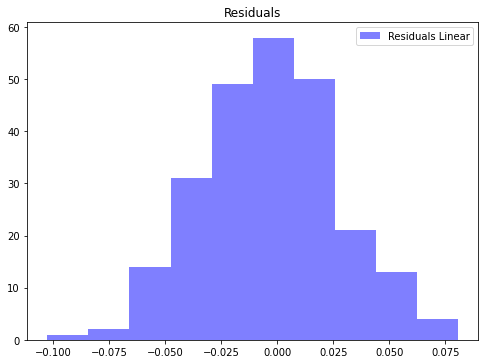

In [221]:
from sklearn import datasets
X,y = datasets.make_regression(int(1e3))

import numpy as np
from sklearn import linear_model
sgd = linear_model.SGDRegressor()
train = np.random.choice([True,False],size=len(y),p=[.75,.25])
sgd.fit(X[train],y[train])
linear_preds = sgd.predict(X[~train])

from matplotlib import pyplot as plt 
f,ax = plt.subplots(figsize=(7,5))
f.tight_layout()
ax.hist(linear_preds - y[~train],label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Residuals")
ax.legend(loc='best');